In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd
from pandas.io.json import json_normalize
%matplotlib notebook
import seaborn as sns
from pylab import *
# author: jsara72
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
import random
import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk import word_tokenize
import pandas as pd
import re
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
import numpy as np
from matplotlib import pyplot as plt
sns.set_style("white")

In [2]:
def griffin():
    
    order = ['id','time','text','language','retweeted','user_id']
    
    idt = re.compile("id:.*?created_at:")
    idt_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[3:-13]), idt.findall(f.read())))
    
    f.seek(0)
    time = re.compile("created_at:.*?text:")
    time_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[11:-7]), time.findall(f.read())))
    
    f.seek(0)

    text = re.compile("text:.*?lang:",re.DOTALL)
    text_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[5:-7]), text.findall(f.read())))
    
    
    f.seek(0)
    length = re.compile("lang:.*?source:")
    length_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[5:-9]), length.findall(f.read())))
    
    f.seek(0)
    retweeted = re.compile("retweeted:.*?retweet_count:")
    retweeted_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[10:-16]), retweeted.findall(f.read())))
    
    f.seek(0)
    retweet_counts = re.compile("retweet_counts:.*")
    retweet_counts_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[14:-1]), retweet_counts.findall(f.read())))
    
    f.seek(0)
    user_id_raw = re.findall(",[\w\d\-]+,\d+,['\+\w/\.\-\s\(\)&]+,['\w\s\^\$\*\+\?\{\}\[\]\\\|\(\)\.\-@:%\+~#\?&/=!]+,-?[\d\w]+,\w+], entities:", f.read())
    user_id = [re.findall(",.*?,",x)[0] for x in user_id_raw]
    # just for test
    '''f.seek(0)

    user_id_greedy = re.findall(".*?entities:", f.read())
    for u_g in user_id_greedy:
        matched = False
        for u_id in user_id:
            if u_id in u_g:
                matched = True
        if not matched:
            print(u_g)
    '''# end
    user_id_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[1:-1]), user_id))
   
    print(len(idt_temp),len(time_temp),len(text_temp),len(length_temp),len(retweeted_temp),len(user_id_temp))
    #print(user_id_temp)
    
    df = pd.DataFrame({order[0]: idt_temp,
                        order[1]: time_temp,
                        order[2]: text_temp,
                        order[3]: length_temp,
                        order[4]: retweeted_temp,
                        order[5]: user_id_temp})
    return df

In [3]:
f = open("part-00000") # 36725 tweets in this file

In [4]:
df0 = griffin()

36725 36725 36725 36725 36725 36725


In [5]:
#df0.head()

In [6]:
#open file with the rest of our tweets
f = open("part2-00000")
#add them to our dataset
df_secondhalf = griffin()
#df_tot = pd.concat([df_0, df_secondhalf])

91819 91819 91819 91819 91819 91819


In [7]:
df_tot = pd.concat([df0, df_secondhalf], ignore_index=True)

In [8]:
len(df_tot)

128544

In [9]:
d = df_tot.duplicated(['id'])
df_tot['duplicate_id'] = d
#appends a new column that tells us if this tweet is a repeat
# we need to filter these tweets out!
df = df_tot.loc[lambda df_tot: df_tot['duplicate_id'] == 0]
#new dataframe df_filtered with repeat tweets filtered out (this keeps first version but not repeated version)

In [10]:
len(df)

128290

In [11]:
dd = df.duplicated(['user_id'])
df['duplicate_user'] = dd
#appends a new column that tells us if this tweet is by a new user
# with no other tweets in our dataset

/Users/Griffin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
df.text[0]

'A guy who is so excited to draw a uterus on a poster for you to carry around a #WomansMarch is one to keep around  '

In [13]:
#adding sentiment analysis
from sentiment_analysis import train_classifier
from sentiment_analysis import pickle
from sentiment_analysis import VoteClassifier
from sentiment_analysis import find_features
from sentiment_analysis import get_filtered_tokens
classifier = train_classifier()

def classify_tweet(text, classifier):
    tokens = get_filtered_tokens(text)
    pure_text = re.sub(r"http\S+", "", text)
    pure_text = re.sub(r"RT @.*?: ", "", pure_text)
    pure_text = re.sub(r"@\w+", "", pure_text)
#     print("-----", text, "--->", pure_text, "------")
    cl = classifier.classify(find_features(text, tokens))
    #print(text, cl)
    return cl

classify_tweet(df.text[0], classifier)

/Users/Griffin/anaconda/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DictVectorizer from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/Griffin/anaconda/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator NuSVC from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/Griffin/anaconda/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/Griffin/anaconda/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LinearSVC from version pre-0.18 when using version 0.18.1. This might lead to breaking co

0

In [14]:
df.text[1]

"@womensmarchlon Sorry I can't be there today. With you in spirit. https://t.co/WagNcU6KiI"

In [15]:
tweet_sentiment = []

for i in range(len(df['text'])):
    tweet_sentiment.append(classify_tweet(df['text'].values[i], classifier))
    #print(df['text'].values[i],classify_tweet(df['text'].values[i], classifier))

In [16]:
#tweet_sentiment

In [17]:
df2 = df.loc[lambda df: df['duplicate_user'] == 0]
#new dataframe with only tweets by users who haven't tweeted yet

In [18]:
df3 = df.loc[lambda df: df['duplicate_user'] == 1]
#new dataframe with only tweets from users who tweeted before

In [19]:
#df.loc[lambda df: df['user_id'] == 'alej_cx']

In [20]:
print('# tweets...') 
print(len(df))
print('# of first tweets')
print(len(df2))
print('# of tweets by same users')
print(len(df3))

# tweets...
128290
# of first tweets
113741
# of tweets by same users
14549


In [21]:
#appending a datetime form of the 'time' column to our dataframes (this is easier to work with in pandas)
aaa = df['time']
times_df = pd.to_datetime(aaa)
df['datetime_times'] = times_df
bbb = df2['time']
times_df2 = pd.to_datetime(bbb)
df2['datetime_times'] = times_df2
ccc = df3['time']
times_df3 = pd.to_datetime(ccc)
df3['datetime_times'] = times_df3

/Users/Griffin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Griffin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Griffin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [22]:
# Putting tweets into 10 minute bins so we can make a histogram of tweets vs. time
# change '10T' to 'xT' for x-minute bin size
times_df = df['datetime_times']
series = pd.Series(1, index=times_df)
times_df_10minbins = series.resample('10T').sum()

times_df2 = df2['datetime_times']
series2 = pd.Series(1, index=times_df2)
times_df2_10minbins = series2.resample('10T').sum()

times_df3 = df3['datetime_times']
series3 = pd.Series(1, index=times_df3)
times_df3_10minbins = series3.resample('10T').sum()

In [23]:
#making any nan->0
import math

for i in range(len(times_df3_10minbins)):
    t = times_df3_10minbins.values[i]
    if math.isnan(t)==True:
        times_df3_10minbins.values[i] = 0.
        
        

In [24]:
# Putting tweets into 10 minute bins so we can make a histogram of tweets vs. time
# change '10T' to 'xT' for x-minute bin size
times_df = df['datetime_times']
series = pd.Series(1, index=times_df)
times_df_30minbins = series.resample('30T').sum()

times_df2 = df2['datetime_times']
series2 = pd.Series(1, index=times_df2)
times_df2_30minbins = series2.resample('30T').sum()

times_df3 = df3['datetime_times']
series3 = pd.Series(1, index=times_df3)
times_df3_30minbins = series3.resample('30T').sum()

In [25]:
#creating plot labels
x2_axis=np.arange(len(times_df3_30minbins))
test1 = np.linspace(0,46,23)
test2 = times_df2_30minbins.index[::4]
xlabels_30mins = ['07:30','08:30','09:30','10:30','11:30','12:30','13:30','14:30','15:30','16:30','17:30','18:30','19:30','20:30','21:30','22:30','23:30','00:30','01:30','02:30','03:30','04:30','05:30','06:30']
xlabels_1hour = ['07:30','','09:30','','11:30','','13:30','','15:30','','17:30','','19:30','','21:30','','23:30','','01:30','','03:30','','05:30','']
print(test1)
print(x2_axis)
print(xlabels_30mins)

[  0.           2.09090909   4.18181818   6.27272727   8.36363636
  10.45454545  12.54545455  14.63636364  16.72727273  18.81818182
  20.90909091  23.          25.09090909  27.18181818  29.27272727
  31.36363636  33.45454545  35.54545455  37.63636364  39.72727273
  41.81818182  43.90909091  46.        ]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
['07:30', '08:30', '09:30', '10:30', '11:30', '12:30', '13:30', '14:30', '15:30', '16:30', '17:30', '18:30', '19:30', '20:30', '21:30', '22:30', '23:30', '00:30', '01:30', '02:30', '03:30', '04:30', '05:30', '06:30']


In [26]:
#plotting # all tweets vs time (p1, blue) and # tweets from new users
# vs time (p2, red)
colors = sns.color_palette("hls", 8)
sns.set_style("ticks", {"xtick.major.size": 0, "ytick.major.size": 8})
x2_axis=np.arange(len(times_df3_30minbins))
fig, ax = plt.subplots(1)
ind = x2_axis 
width_sep = 0.5
b1 = ax.bar(ind, times_df_30minbins, color=colors[3])
b2 = ax.bar(ind, times_df2_30minbins,color = colors[7])
#b3 = ax.bar(ind, times_df3_30minbins, color = colors[5])
ax.tick_params(axis ='y', labelsize=14)
ax.set_xticks(test1)
ax.set_xticklabels(xlabels_1hour, rotation = 45,fontsize = 14)
ax.set_xlabel('Time',fontsize = 16)
ax.set_ylabel('Counts',fontsize = 16)
ax.legend((b1, b2, b3), ('Continuing Users', 'New Users'),fontsize = 13)
ax.set_title('Twitter Activity Evolution',fontsize = 16)
plt.tight_layout()

<IPython.core.display.Javascript object>

NameError: name 'b3' is not defined

<IPython.core.display.Javascript object>


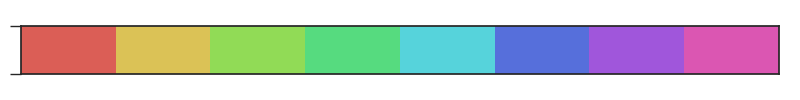

In [27]:
sns.palplot(colors)

In [28]:
def get_filtered_tokens2(text):
    tokens = word_tokenize(text)
    #stop_words = set(stopwords.words('english'))
    filtered_tokens = [w.lower() for w in tokens if not w.lower() and not w.lower() in [':',"#", '@', 'https', ';','&', ',']]
    #print(nltk.FreqDist(filtered_tokens).most_common(200))
   #return filtered_tokens

In [29]:
#tokens = word_tokenize(df['text'][1])
#print(tokens)

In [30]:
#counts then number of I's, you's and we's. Gives info about self-awareness.
i_count = np.zeros(len(df['text']))
you_count = np.zeros(len(df['text']))
we_count = np.zeros(len(df['text']))

for i in range(len(df['text'].values)):
    tokens = [ s.lower() for s in word_tokenize(df['text'].values[i])]
    for j in range(len(tokens)):
        if tokens[j]=='i':
            i_count[i] +=1
        elif tokens[j]=='you':
            you_count[i] +=1
        elif tokens[j]=='we':
            we_count[i] +=1
            
print('Mean number of 1st person singular...') 
print(np.mean(i_count))
print('Mean number of 1st person plural...') 
print(np.mean(we_count))
print('Mean number of 2nd person...') 
print(np.mean(you_count))
print('Std 1st person singular...')
print(np.std(i_count))
print('Std 1st person plural...')
print(np.std(we_count))
print('Std 2nd person...')
print(np.std(you_count))

Mean number of 1st person singular...
0.155374542053
Mean number of 1st person plural...
0.0911918310079
Mean number of 2nd person...
0.100116922597
Std 1st person singular...
0.447073431502
Std 1st person plural...
0.337720654135
Std 2nd person...
0.371043429593


In [31]:
# obtaining the number of @-mentions, number of manual retweets, and number of manual retweets with an @ in them
at_count = np.zeros(len(df['text']))
RT_count = np.zeros(len(df['text']))
RT_at_count = np.zeros(len(df['text']))

for i in range(len(df['text'].values)):
    tokens = [ s.lower() for s in word_tokenize(df['text'].values[i])]
    for j in range(len(tokens)):
        if tokens[j]=='@':
            at_count[i] +=1
        elif tokens[j]=='rt':
            RT_count[i] +=1
            for k in range(len(tokens)):
                if tokens[k]=='@':
                    RT_at_count[i] +=1
                    break        

In [32]:
print('total number of tweets...')
print(len(df))
print('number of @...')
print(np.sum(at_count))
print('number of RT...')
print(np.sum(RT_count))
print('number of RT with an @...')
print(np.sum(RT_at_count))

total number of tweets...
128290
number of @...
131030.0
number of RT...
106444.0
number of RT with an @...
106307.0


In [53]:
times_df = df['datetime_times']
series = pd.Series(1, index=times_df)
times_df_60minbins = series.resample('60T').sum()
series_at = pd.Series(at_count, index=times_df)
at_60min = series_at.resample('60T').sum()
series_rt = pd.Series(RT_count, index=times_df)
rt_60min = series_rt.resample('60T').sum()


In [54]:
at_60min_norm = at_60min/times_df_60minbins
rt_60min_norm = rt_60min/times_df_60minbins

<IPython.core.display.Javascript object>


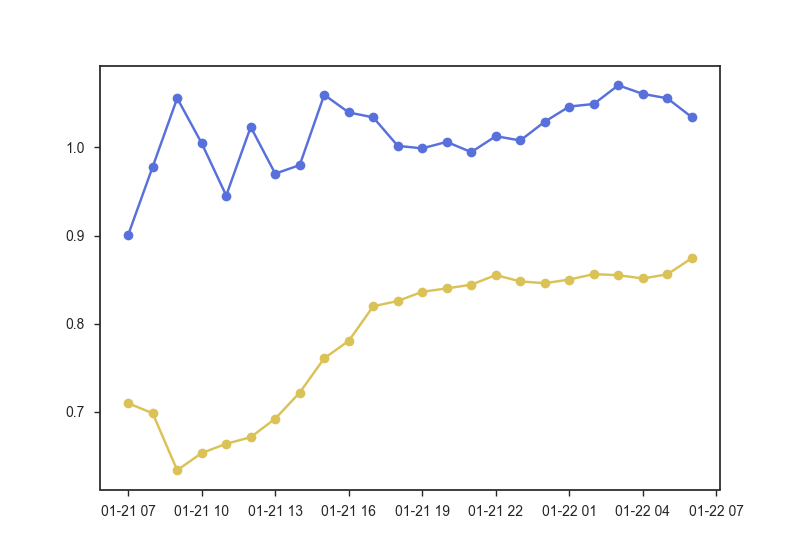

In [55]:
xaxis = list(range(0,len(at_count)))
xaxis2 = np.linspace(0,16,17)
xlabels_1hour2 = ['03:30','','06:30','','09:30','','12:30','','15:30','','18:30','','21:30','','00:30','','03:30']


sns.set_style("ticks", {"xtick.major.size": 4, "ytick.major.size": 4})
fig, ax = plt.subplots(1)
p1 = ax.plot(at_60min_norm, 'o-', color = colors[5])
p2 = ax.plot(rt_60min_norm, 'o-', color = colors[1])
#ax.set_xticks(xaxis2)
#ax.tick_params(axis ='y', labelsize=14)
#ax.tick_params(axis ='x', labelsize=14)
#ax.set_yticklabels(1/ratio, fontsize = 12)
#ax.set_xticklabels(xlabels_1hour2)
#ax.set_xlabel('Time',fontsize = 16)
#ax.set_ylabel('Continuing Users / New Users',fontsize = 16)
#ax.set_title('Ratio of Continuing Users to New Users Over Time',fontsize = 16)

In [34]:
df.head()

,id,language,retweeted,text,time,user_id,duplicate_id,duplicate_user,datetime_times
0,822707826460073985,en,false,A guy who is so excited to draw a uterus on a ...,Sat Jan 21 07:30:05 +0000 2017,emmakahen,False,False,2017-01-21 07:30:05
1,822707847440035840,en,false,@womensmarchlon Sorry I can't be there today. ...,Sat Jan 21 07:30:10 +0000 2017,f4rheen,False,False,2017-01-21 07:30:10
2,822707893581578240,en,false,Worldwide Womens March kicks off in New Zea...,Sat Jan 21 07:30:21 +0000 2017,blackmoonlili,False,False,2017-01-21 07:30:21
3,822707927140052992,ja,false,RT @channel__3: 2000 #WomensMarch \nhttps://t...,Sat Jan 21 07:30:29 +0000 2017,Zero_B_Eventail,False,False,2017-01-21 07:30:29
4,822707943938420736,en,false,RT @politicalmiller: While Trump's #Inaugurati...,Sat Jan 21 07:30:33 +0000 2017,Amplitude350Lee,False,False,2017-01-21 07:30:33


In [35]:
#Proof that 'retweet' section is broken
#test1 = df.loc[lambda df: df['retweeted'] == 'false']
#print('# not retweeted =')
#print(len(test1))
#test2 = df.loc[lambda df: df['retweeted'] == 'true']
#print('# retweeted = ') 
#print(len(test2))

In [36]:
#df.text[1]

In [37]:
#nltk.FreqDist(df['text']).most_common(20)

In [38]:
keywords = ['womensmarch', 'women', 'march', 'washington', 'rights', 'woman', 'london','womensmarchonwashington']
otherfilters = ['!','?',':',"#", '@', 'https', ';','&', ',','.','rt','-','...']

def get_filtered_tokens(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w.lower() for w in tokens if not w.lower() in stop_words and not w.lower() in otherfilters and not len(w.lower()) < 4 and not w.lower() in keywords]
    #I added len(w.lower()) < 4 to filter out really short words
    return nltk.FreqDist(filtered_tokens).most_common(20) #change 20 -> x for x most frequent words
   #return filtered_tokens

In [39]:
appended_text = ''
for t in df['text']:
    appended_text += t

In [40]:
#getting most frequent words (with length > 3)
topwords = get_filtered_tokens(appended_text)
topwords = np.array(topwords)

#changing the number of topwords from string to int
for i in range(len(topwords[:,1])):
    t = int(topwords[i,1])
    topwords[i,1] = t
    

In [41]:
t = map(int, topwords[:,1])
t = np.array(list(t))
t = t/len(df)
w = topwords[:,0]

In [42]:
print(w)

['today' 'trump' 'marching' 'people' 'womensmarchrt' 'love' 'proud'
 'protest' 'inauguration' 'world' 'like' 'marches' 'sign' 'crowd' 'signs'
 'history' 'around' 'america' 'right' 'thanks']


<IPython.core.display.Javascript object>


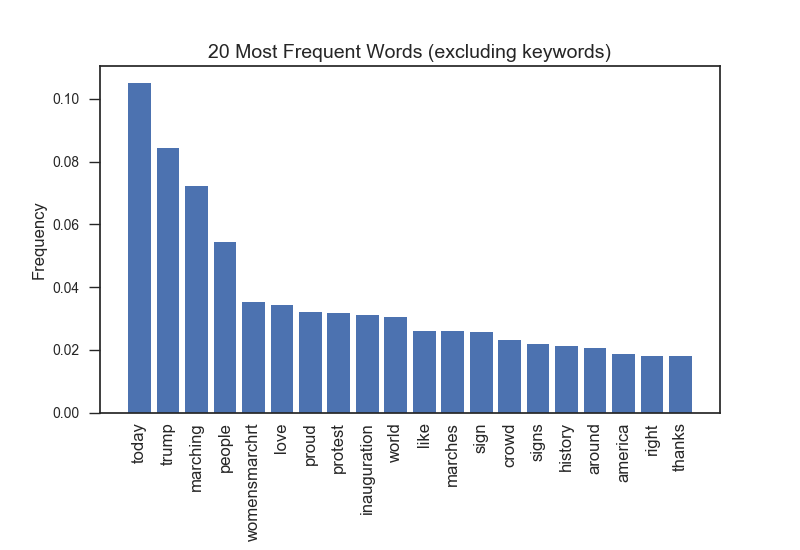

In [43]:
x_axis=np.arange(len(w))
plt.tight_layout()
fig, ax = plt.subplots(1)
fig.subplots_adjust(bottom = 0.25)
ind = x_axis 
width_sep = 1
ax.bar(ind, t)
ax.set_xticks(ind)
ax.set_xticklabels(w, rotation = 90, fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
ax.set_title('20 Most Frequent Words (excluding keywords)', fontsize = 14)